In [1]:
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing datasets
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [3]:
dfs=pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date')

In [4]:
dfs

,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0
...,...,...,...,...,...,...
16946,NaN,Burma,21.9162,95.9560,3/28/20,8
16947,Anguilla,United Kingdom,18.2206,-63.0686,3/28/20,2
16948,British Virgin Islands,United Kingdom,18.4207,-64.6400,3/28/20,2
16949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,3/28/20,4


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16951 entries, 0 to 16950
Data columns (total 6 columns):
Province/State    5293 non-null object
Country/Region    16951 non-null object
Lat               16951 non-null float64
Long              16951 non-null float64
Date              16951 non-null object
value             16951 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 794.7+ KB


In [6]:
dfs['Date']=pd.to_datetime(dfs['Date'])

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16951 entries, 0 to 16950
Data columns (total 6 columns):
Province/State    5293 non-null object
Country/Region    16951 non-null object
Lat               16951 non-null float64
Long              16951 non-null float64
Date              16951 non-null datetime64[ns]
value             16951 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 794.7+ KB


In [8]:
dfs=dfs.sort_values(['Country/Region','Province/State','Date']).reset_index(drop=True)


In [9]:
dfs

,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0
...,...,...,...,...,...,...
16946,NaN,Zimbabwe,-20.0,30.0,2020-03-24,3
16947,NaN,Zimbabwe,-20.0,30.0,2020-03-25,3
16948,NaN,Zimbabwe,-20.0,30.0,2020-03-26,3
16949,NaN,Zimbabwe,-20.0,30.0,2020-03-27,5


In [10]:
dfs[dfs['Country/Region']=='Thailand']

,Province/State,Country/Region,Lat,Long,Date,value
15142,NaN,Thailand,15.0,101.0,2020-01-22,2
15143,NaN,Thailand,15.0,101.0,2020-01-23,3
15144,NaN,Thailand,15.0,101.0,2020-01-24,5
15145,NaN,Thailand,15.0,101.0,2020-01-25,7
15146,NaN,Thailand,15.0,101.0,2020-01-26,8
...,...,...,...,...,...,...
15204,NaN,Thailand,15.0,101.0,2020-03-24,827
15205,NaN,Thailand,15.0,101.0,2020-03-25,934
15206,NaN,Thailand,15.0,101.0,2020-03-26,1045
15207,NaN,Thailand,15.0,101.0,2020-03-27,1136


In [23]:
dfs[dfs['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,Date,value
3685,Anhui,China,31.8257,117.2264,2020-01-22,1
3686,Anhui,China,31.8257,117.2264,2020-01-23,9
3687,Anhui,China,31.8257,117.2264,2020-01-24,15
3688,Anhui,China,31.8257,117.2264,2020-01-25,39
3689,Anhui,China,31.8257,117.2264,2020-01-26,60
...,...,...,...,...,...,...
5891,Zhejiang,China,29.1832,120.0934,2020-03-24,1240
5892,Zhejiang,China,29.1832,120.0934,2020-03-25,1241
5893,Zhejiang,China,29.1832,120.0934,2020-03-26,1243
5894,Zhejiang,China,29.1832,120.0934,2020-03-27,1247


In [24]:
dfsct=dfs.groupby(['Country/Region','Date']).sum()[['value']]

In [25]:
dfsct

value
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Zimbabwe       2020-03-24      3
               2020-03-25      3
               2020-03-26      3
               2020-03-27      5
               2020-03-28      7

[11859 rows x 1 columns]

In [26]:
dfsct.loc['Thailand']

,value
Date,
2020-01-22,2
2020-01-23,3
2020-01-24,5
2020-01-25,7
2020-01-26,8
...,...
2020-03-24,827
2020-03-25,934
2020-03-26,1045


In [27]:
dfsct.reset_index(inplace=True)
dfsct


,Country/Region,Date,value
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
11854,Zimbabwe,2020-03-24,3
11855,Zimbabwe,2020-03-25,3
11856,Zimbabwe,2020-03-26,3
11857,Zimbabwe,2020-03-27,5


In [28]:
dfsct['daily_new']=dfsct.groupby(['Country/Region'])['value'].diff()

In [29]:
dfsct

,Country/Region,Date,value,daily_new
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
11854,Zimbabwe,2020-03-24,3,0.0
11855,Zimbabwe,2020-03-25,3,0.0
11856,Zimbabwe,2020-03-26,3,0.0
11857,Zimbabwe,2020-03-27,5,2.0


In [30]:
#dfsct.loc['China']

In [31]:
#dfsct.loc['China'].to_csv('china_data.csv') 

In [32]:
dfTl=dfsct[dfsct['Country/Region']=='Thailand']

In [33]:
dfTl

,Country/Region,Date,value,daily_new
10653,Thailand,2020-01-22,2,NaN
10654,Thailand,2020-01-23,3,1.0
10655,Thailand,2020-01-24,5,2.0
10656,Thailand,2020-01-25,7,2.0
10657,Thailand,2020-01-26,8,1.0
...,...,...,...,...
10715,Thailand,2020-03-24,827,106.0
10716,Thailand,2020-03-25,934,107.0
10717,Thailand,2020-03-26,1045,111.0
10718,Thailand,2020-03-27,1136,91.0


In [34]:
dfcn=dfsct[dfsct['Country/Region']=='China']

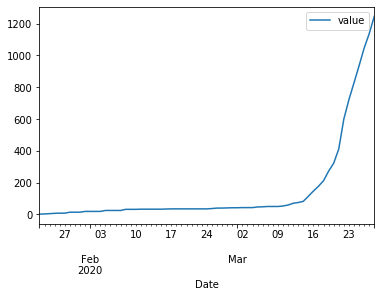

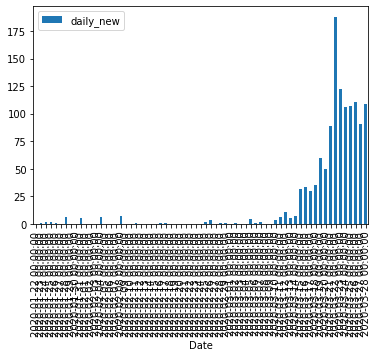

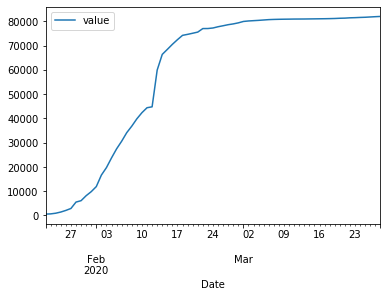

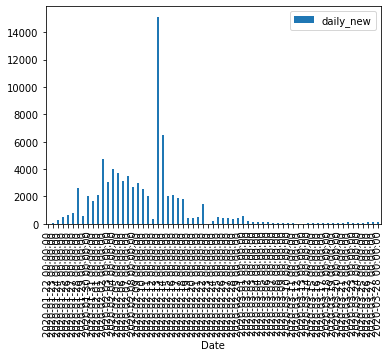

In [38]:
dfTl.plot(x ='Date', y='value', kind = 'line')
dfTl.plot(x ='Date', y='daily_new', kind = 'bar')
dfcn.plot(x ='Date', y='value', kind = 'line')
dfcn.plot(x ='Date', y='daily_new', kind = 'bar')
plt.show()
